# Install & Load Packages

In [ ]:
!pip install scipy==1.11.4
!pip install scikit-plot
!pip install dalex

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 44.0 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 19.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for dalex: filename=dalex-1.7.1-py3-none-any.whl size=1042797 sha256=6b72f88e6ecc54a63a5a22a59e766c9ca9d37585f54ceef553ccf027e4e1ab9a
  Stored in directory: /root/.cache/pip/wheels/fe/c2/41/63e006b3312a4e17299bed5f83d985dea872368f9ab16bb20f
Successfully built dalex


In [ ]:
import numpy as np # untuk manipulasi objek array dan fungsi aritmatika lainnya
import pandas as pd # untuk menipulasi objek dataframe
import matplotlib.pyplot as plt # untuk visualisasi data
import seaborn as sns # untuk visualisasi data yang jauh lebih mudah

# untuk encode data string menjadi numerik
from sklearn.preprocessing import LabelEncoder
# untuk spliting data menjadi train dan test
from sklearn.model_selection import train_test_split
# untuk pemodelan logistic regression
from sklearn.linear_model import LogisticRegression
# untuk pemodelan naive bayes
from sklearn.naive_bayes import MultinomialNB, GaussianNB
# untuk pemodelan random forest
from sklearn.ensemble import RandomForestClassifier
# untuk evaluasi model
from sklearn import metrics
# untuk hyperparameter tuning
from sklearn.model_selection import GridSearchCV
# untuk visualisasi ROC
import scikitplot as skplt
# untuk interpretasi model
import dalex as dx

# Load Dataset

In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d "zeshanali/googleplaystore"

Dataset URL: https://www.kaggle.com/datasets/zeshanali/googleplaystore
License(s): unknown
100% 304k/304k [00:00<00:00, 871kB/s]
100% 304k/304k [00:00<00:00, 870kB/s]


In [ ]:
import zipfile

dataset_zip = zipfile.ZipFile("/content/googleplaystore.zip", "r")
dataset_zip.extractall()
dataset_zip.close()

In [ ]:
raw_data = pd.read_csv("/content/googleplaystore.csv")
raw_data.sample(frac = 1).head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5992,PPCNP-BC Pocket Prep,MEDICAL,NaN,3,12M,50+,Free,0,Everyone,Medical,12-Jul-18,4.5.2,4.4 and up
10144,EZ-GUI Ground Station,TOOLS,4.7,3696,29M,"50,000+",Free,0,Everyone,Tools,10-Aug-17,4.5,4.3 and up
9299,EF Catalogues · Kataloge,BUSINESS,NaN,15,4.3M,500+,Free,0,Everyone,Business,21-Sep-16,1.0.1 (1.5.1),4.0 and up
4835,Reload: The Z-Team,GAME,4.3,1655,91M,"100,000+",Free,0,Everyone 10+,Action,28-Feb-18,1.6.2,4.4 and up
608,Chat Kids - Chat Room For Kids,DATING,4.7,6,4.9M,100+,Free,0,Mature 17+,Dating,24-Jul-18,1,4.0.3 and up


In [ ]:
raw_data.shape

(10841, 13)

# Data Inspection

In [ ]:
# cek struktur data
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
# cek apakah ada dataset yang hilang
raw_data.isna().sum()

,0
App,0
Category,0
Rating,1474
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content Rating,1
Genres,0


# Preprocessing Data

In [ ]:
# hapus baris data yg bernilai nan
preprocessed_data = raw_data.dropna()
preprocessed_data.isna().sum()

,0
App,0
Category,0
Rating,0
Reviews,0
Size,0
Installs,0
Type,0
Price,0
Content Rating,0
Genres,0


In [ ]:
preprocessed_data.shape

(9360, 13)

In [ ]:
# perbaiki format data numeric-string menjadi numerik
preprocessed_data['Price'] = preprocessed_data['Price'].replace('[\$,]', '', regex=True).astype(float)
preprocessed_data['Installs'] = preprocessed_data['Installs'].replace('[\+,]', '', regex=True).astype(int)

In [ ]:
# transform string numeric data to integer

for i in preprocessed_data.columns:
  if preprocessed_data[i].dtype == 'object':
    try:
      preprocessed_data[i] = preprocessed_data[i].astype('int64')
    except:
      continue

In [ ]:
# cek kembali tipe data per kolom
preprocessed_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   int64  
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   int64  
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   float64
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 1023.8+ KB


In [ ]:
# add classes based on rating
# preprocessed_data['Class'] = "5"
# preprocessed_data.loc[preprocessed_data['Rating'] < 5, 'Class'] = 4
# preprocessed_data.loc[preprocessed_data['Rating'] < 4, 'Class'] = 3
# preprocessed_data.loc[preprocessed_data['Rating'] < 3, 'Class'] = 2
# preprocessed_data.loc[preprocessed_data['Rating'] < 2, 'Class'] = 1

# class binning (grouping continuous numerical data to discrete classes)
preprocessed_data['Class'] = 3
preprocessed_data.loc[preprocessed_data['Rating'] < 4, 'Class'] = 2
preprocessed_data.loc[preprocessed_data['Rating'] < 2, 'Class'] = 1

preprocessed_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Class
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up,3
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up,2
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up,3
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up,3
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up,3


In [ ]:
# Count the number of occurrences of each class

class_counts = preprocessed_data['Class'].value_counts()
classes = sorted(class_counts.keys())
class_counts

,count
Class,
3,7363
2,1941
1,56


In [ ]:
# cek nilai unik dari tiap kolom

## ekstrak nama kolom dari dataset
nama_kolom = preprocessed_data.columns

## lakukan iterasi untuk mengecek nilai unik dari tiap kolom
for i in nama_kolom:
    try:
      unique_values = preprocessed_data[i].unique()
      print("Nama kolom: {} ({}, {})".format(i, len(unique_values), preprocessed_data[i].dtype))
      print(unique_values)
    except:
      continue

Nama kolom: App (8190, object)
['Photo Editor & Candy Camera & Grid & ScrapBook' 'Coloring book moana'
 'U Launcher Lite – FREE Live Cool Themes, Hide Apps' ...
 'Fr. Mike Schmitz Audio Teachings' 'The SCP Foundation DB fr nn5n'
 'iHoroscope - 2018 Daily Horoscope & Astrology']
Nama kolom: Category (33, object)
['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']
Nama kolom: Rating (39, float64)
[4.1 3.9 4.7 4.5 4.3 4.4 3.8 4.2 4.6 4.  4.8 4.9 3.6 3.7 3.2 3.3 3.4 3.5
 3.1 5.  2.6 3.  1.9 2.5 2.8 2.7 1.  2.9 2.3 2.2 1.7 2.  1.8 2.4 1.6 2.1
 1.4 1.5 1.2]
Nama kolom: Reviews (5990, i

In [ ]:
# transform string to numeric label encode

label_mappings = {}   # init dictionary to store label encode

preprocessed_data = preprocessed_data.set_index('App')   # skipping app name encoding

for col in preprocessed_data.columns:
  if preprocessed_data[col].dtype == 'object':
    try:
      # encode string to numeric feature
      label_encoder = LabelEncoder()
      preprocessed_data[col] = label_encoder.fit_transform(preprocessed_data[col])
      label_mappings[col] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
    except:
      continue

preprocessed_data.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Class
App,,,,,,,,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,0,4.1,159,47,10000,0,0.0,1,9,1195,104,14,3
Coloring book moana,0,3.9,967,24,500000,0,0.0,1,11,284,932,14,2
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",0,4.7,87510,333,5000000,0,0.0,1,9,6,419,14,3
Sketch - Draw & Paint,0,4.5,215644,87,50000000,0,0.0,4,9,1241,2538,17,3
Pixel Draw - Number Art Coloring Book,0,4.3,967,56,100000,0,0.0,1,10,544,246,19,3


In [ ]:
# cek kembali tipe data per kolom
preprocessed_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9360 entries, Photo Editor & Candy Camera & Grid & ScrapBook to iHoroscope - 2018 Daily Horoscope & Astrology
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        9360 non-null   int64  
 1   Rating          9360 non-null   float64
 2   Reviews         9360 non-null   int64  
 3   Size            9360 non-null   int64  
 4   Installs        9360 non-null   int64  
 5   Type            9360 non-null   int64  
 6   Price           9360 non-null   float64
 7   Content Rating  9360 non-null   int64  
 8   Genres          9360 non-null   int64  
 9   Last Updated    9360 non-null   int64  
 10  Current Ver     9360 non-null   int64  
 11  Android Ver     9360 non-null   int64  
 12  Class           9360 non-null   int64  
dtypes: float64(2), int64(11)
memory usage: 1.3+ MB


# Menghitung korelasi menggunakan korelasi Pearson

<Axes: >

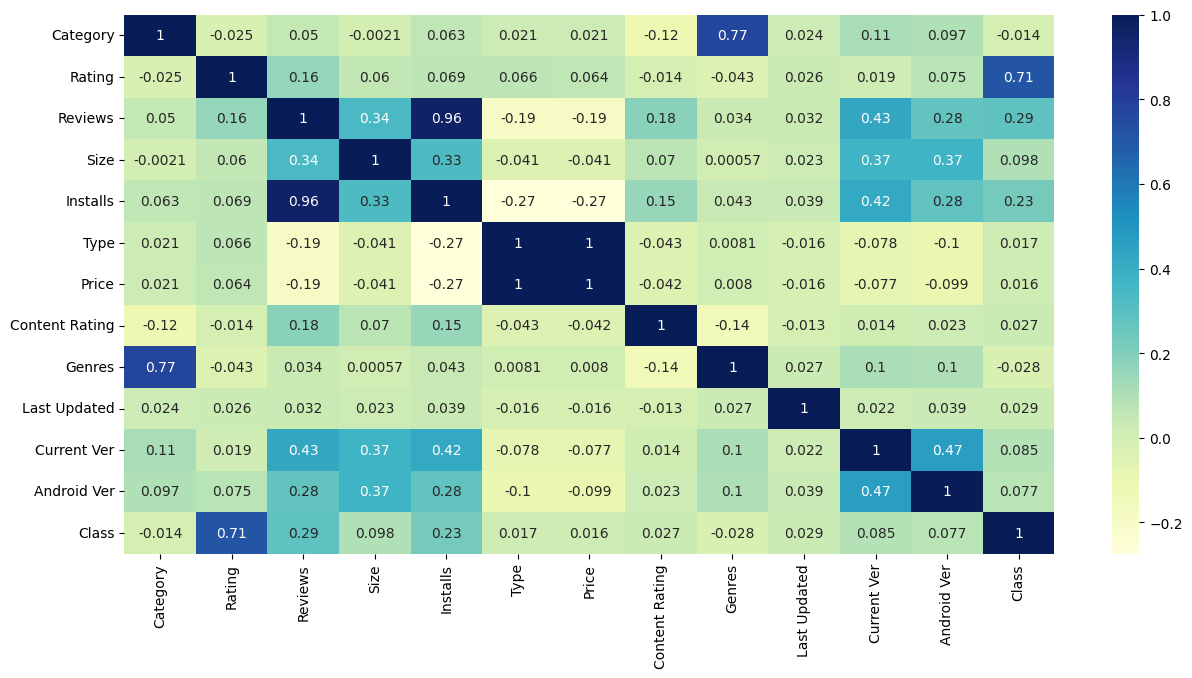

In [ ]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.heatmap(preprocessed_data.corr(method='spearman'), cmap="YlGnBu", annot=True)

In [ ]:
# display encoded label n value

for col, mapping in label_mappings.items():
    print(f"\nMapping for column '{col}':")
    display(pd.DataFrame(list(mapping.items()), columns=['Original', 'Encoded']))


Mapping for column 'Category':


,Original,Encoded
0,ART_AND_DESIGN,0
1,AUTO_AND_VEHICLES,1
2,BEAUTY,2
3,BOOKS_AND_REFERENCE,3
4,BUSINESS,4
5,COMICS,5
6,COMMUNICATION,6
7,DATING,7
8,EDUCATION,8
9,ENTERTAINMENT,9



Mapping for column 'Size':


,Original,Encoded
0,1.0M,0
1,1.1M,1
2,1.2M,2
3,1.3M,3
4,1.4M,4
...,...,...
408,986k,408
409,98M,409
410,994k,410
411,99M,411



Mapping for column 'Type':


,Original,Encoded
0,Free,0
1,Paid,1



Mapping for column 'Content Rating':


,Original,Encoded
0,Adults only 18+,0
1,Everyone,1
2,Everyone 10+,2
3,Mature 17+,3
4,Teen,4
5,Unrated,5



Mapping for column 'Genres':


,Original,Encoded
0,Action,0
1,Action;Action & Adventure,1
2,Adventure,2
3,Adventure;Action & Adventure,3
4,Adventure;Brain Games,4
...,...,...
110,Video Players & Editors,110
111,Video Players & Editors;Creativity,111
112,Video Players & Editors;Music & Video,112
113,Weather,113



Mapping for column 'Last Updated':


,Original,Encoded
0,1-Apr-16,0
1,1-Apr-17,1
2,1-Apr-18,2
3,1-Aug-13,3
4,1-Aug-15,4
...,...,...
1294,9-Nov-17,1294
1295,9-Oct-15,1295
1296,9-Oct-17,1296
1297,9-Sep-15,1297



Mapping for column 'Current Ver':


,Original,Encoded
0,0.0.0.2,0
1,0.0.1,1
2,0.0.2,2
3,0.0.3,3
4,0.0.4,4
...,...,...
2589,v7.0.7.1.0625.1_06_0629,2589
2590,v7.0.9.1.0526.1_06_0704,2590
2591,v8.0.1.8.0629.1,2591
2592,v8[1.0.10],2592



Mapping for column 'Android Ver':


,Original,Encoded
0,1.0 and up,0
1,1.5 and up,1
2,1.6 and up,2
3,2.0 and up,3
4,2.0.1 and up,4
5,2.1 and up,5
6,2.2 and up,6
7,2.3 and up,7
8,2.3.3 and up,8
9,3.0 and up,9


In [ ]:
preprocessed_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9360 entries, Photo Editor & Candy Camera & Grid & ScrapBook to iHoroscope - 2018 Daily Horoscope & Astrology
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        9360 non-null   int64  
 1   Rating          9360 non-null   float64
 2   Reviews         9360 non-null   int64  
 3   Size            9360 non-null   int64  
 4   Installs        9360 non-null   int64  
 5   Type            9360 non-null   int64  
 6   Price           9360 non-null   float64
 7   Content Rating  9360 non-null   int64  
 8   Genres          9360 non-null   int64  
 9   Last Updated    9360 non-null   int64  
 10  Current Ver     9360 non-null   int64  
 11  Android Ver     9360 non-null   int64  
 12  Class           9360 non-null   int64  
dtypes: float64(2), int64(11)
memory usage: 1.3+ MB


In [ ]:
# memisahkan variabel x dan y dari tabel
X_data = preprocessed_data.drop(['Rating', 'Genres', 'Class', 'Last Updated',	'Current Ver', 'Android Ver'], axis = 1)
y_data = preprocessed_data['Class'].astype(str)

In [ ]:
# bagi data untuk training n testing dgn rasio 7:3

X_train, X_test, y_train, y_test = train_test_split(
    X_data,
    y_data,
    test_size = 0.3,
    random_state = 1000
)

In [ ]:
# cek X_train
X_train.sample(frac = 1).head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating
App,,,,,,,
My Tele2,6,158679,334,5000000,0,0.0,1
Postings (Craigslist Search App),26,151095,19,5000000,0,0.0,3
CX watcher,11,4,117,500,0,0.0,1
Lotte Home Shopping LOTTE Homeshopping,26,8820,128,5000000,0,0.0,1
Adblock Browser for Android,6,121113,146,10000000,0,0.0,1


In [ ]:
# cek y_train
y_train.head()

,Class
App,
Seattle Sounders FC,2
Dr. Splorchy Presents Space Heroes,3
Avokiddo Emotions,3
Looper!,3
Kids Balloon Pop Game Free 🎈,3


In [ ]:
# cek X_test
X_test.head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating
App,,,,,,,
PixelDot - Color by Number Sandbox Pixel Art,11,16041,282,1000000,0,0.0,1
"MailChimp - Email, Marketing Automation",4,5448,19,500000,0,0.0,1
Photo Lock App - Hide Pictures & Videos,23,29203,107,5000000,0,0.0,1
Roman Clock AW-7,29,52,104,5000,0,0.0,1
HD Camera,24,49680,333,5000000,0,0.0,1


In [ ]:
# cek y_test
y_test.head()

,Class
App,
PixelDot - Color by Number Sandbox Pixel Art,3
"MailChimp - Email, Marketing Automation",3
Photo Lock App - Hide Pictures & Videos,3
Roman Clock AW-7,3
HD Camera,3


# Modelling

## Logistic Regression

In [ ]:
logreg_model = LogisticRegression(max_iter=200)
logreg_model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [ ]:
logreg_result = logreg_model.predict(X_test)
logreg_proba = logreg_model.predict_proba(X_test)

<Axes: title={'center': 'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

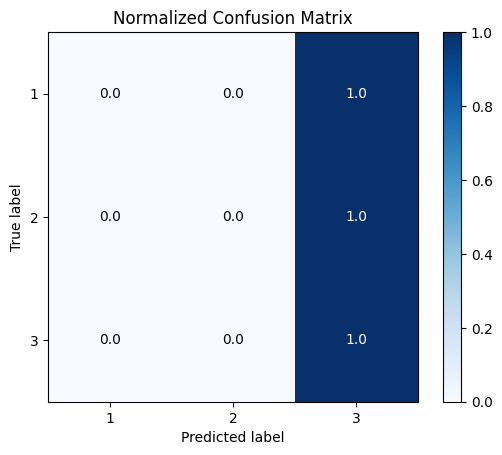

In [ ]:
# evaluasi model logistic regression
skplt.metrics.plot_confusion_matrix(y_test, logreg_result, normalize=True)

In [ ]:
# Evaluasi model logistic regression
pd.DataFrame(metrics.classification_report(y_test, logreg_result, target_names = classes, output_dict=True))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,1,2,3,accuracy,macro avg,weighted avg
precision,0.0,1.000000,0.781540,0.781695,0.593847,0.824756
recall,0.0,0.003322,1.000000,0.781695,0.334441,0.781695
f1-score,0.0,0.006623,0.877375,0.781695,0.294666,0.686635
support,13.0,602.000000,2193.000000,0.781695,2808.000000,2808.000000


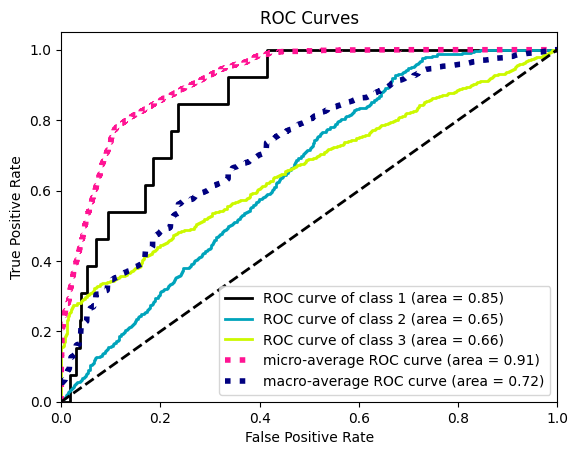

In [ ]:
# Evaluasi model logistic regression menggunakan ROC AUC
skplt.metrics.plot_roc(y_test, logreg_proba);

## Random Forest

In [ ]:
randfor_model = RandomForestClassifier(n_estimators=900, random_state=1000, max_depth=None)
randfor_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=900, random_state=1000)

In [ ]:
randfor_result = randfor_model.predict(X_test)
randfor_proba = randfor_model.predict_proba(X_test)

<Axes: title={'center': 'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

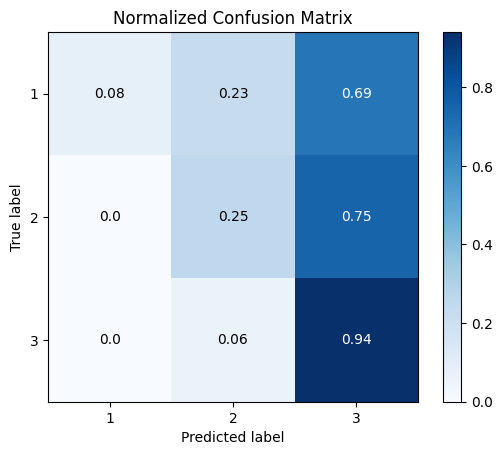

In [ ]:
# evaluasi model random forest
skplt.metrics.plot_confusion_matrix(y_test, randfor_result, normalize=True)

In [ ]:
# Evaluasi model random forest
pd.DataFrame(metrics.classification_report(y_test, randfor_result, target_names = classes, output_dict=True))

,1,2,3,accuracy,macro avg,weighted avg
precision,0.333333,0.517361,0.816845,0.785613,0.555847,0.750401
recall,0.076923,0.247508,0.937528,0.785613,0.420653,0.785613
f1-score,0.125000,0.334831,0.873036,0.785613,0.444289,0.754189
support,13.000000,602.000000,2193.000000,0.785613,2808.000000,2808.000000


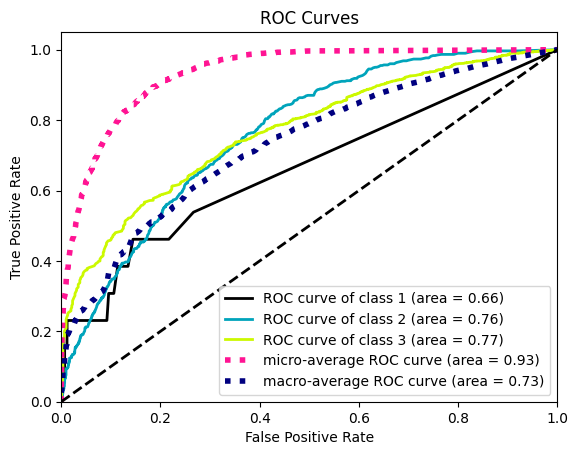

In [ ]:
# Evaluasi model random forest
skplt.metrics.plot_roc(y_test, randfor_proba);

## Naive Bayes (Gaussian)

In [ ]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [ ]:
nb_result = nb_model.predict(X_test)
nb_proba = nb_model.predict_proba(X_test)

<Axes: title={'center': 'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

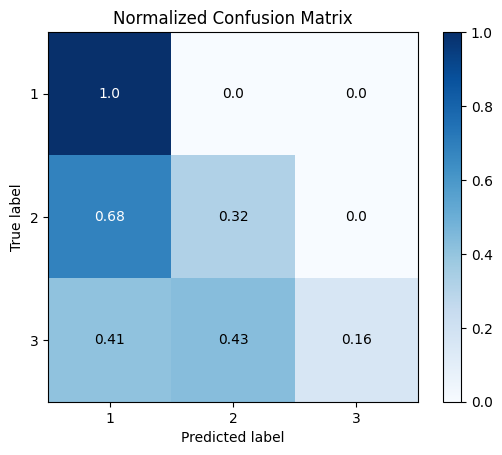

In [ ]:
# evaluasi model naive bayes
skplt.metrics.plot_confusion_matrix(y_test, nb_result, normalize=True)

In [ ]:
# Evaluasi model naive bayes
pd.DataFrame(metrics.classification_report(y_test, nb_result, target_names = sorted(y_data.unique()), output_dict=True))   # , '4', '5'

,1,2,3,accuracy,macro avg,weighted avg
precision,0.009878,0.168421,0.991477,0.197293,0.389926,0.810480
recall,1.000000,0.318937,0.159143,0.197293,0.492693,0.197293
f1-score,0.019564,0.220436,0.274263,0.197293,0.171421,0.261544
support,13.000000,602.000000,2193.000000,0.197293,2808.000000,2808.000000


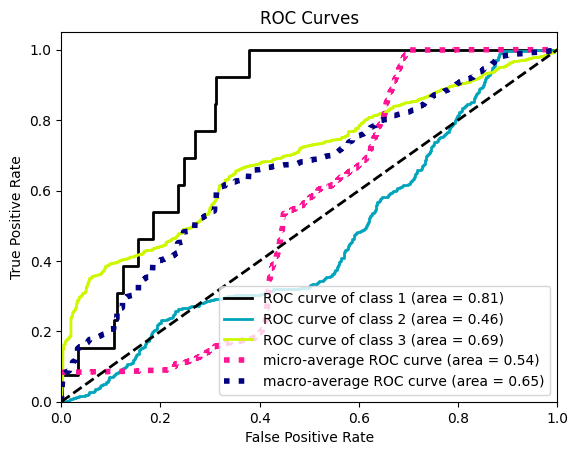

In [ ]:
# Evaluasi model naive Bayes
skplt.metrics.plot_roc(y_test, nb_proba);

## Naive Bayes (Multinomial)

In [ ]:
nb_model_multi = MultinomialNB()
nb_model_multi.fit(X_train, y_train)

MultinomialNB()

In [ ]:
nb_result_multi = nb_model_multi.predict(X_test)
nb_proba_multi = nb_model_multi.predict_proba(X_test)

<Axes: title={'center': 'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

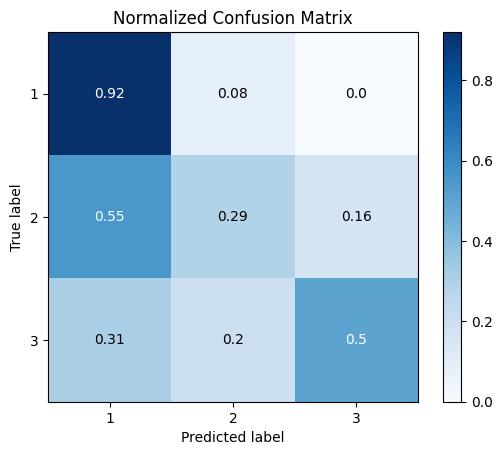

In [ ]:
# evaluasi model naive bayes
skplt.metrics.plot_confusion_matrix(y_test, nb_result_multi, normalize=True)

In [ ]:
# Evaluasi model naive bayes
pd.DataFrame(metrics.classification_report(y_test, nb_result_multi, target_names = classes, output_dict=True))

,1,2,3,accuracy,macro avg,weighted avg
precision,0.011799,0.285714,0.918782,0.452991,0.405432,0.778861
recall,0.923077,0.289037,0.495212,0.452991,0.569109,0.452991
f1-score,0.023301,0.287366,0.643556,0.452991,0.318074,0.564321
support,13.000000,602.000000,2193.000000,0.452991,2808.000000,2808.000000


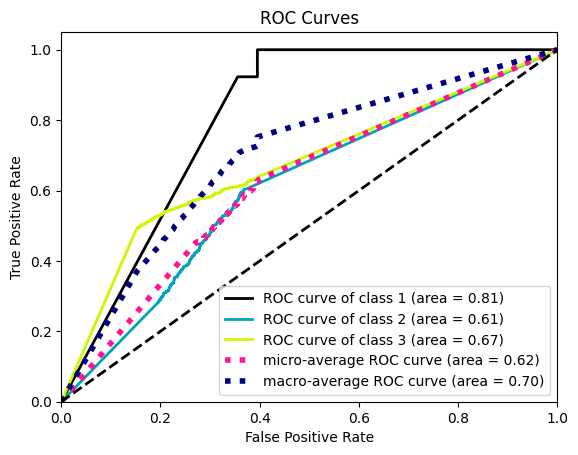

In [ ]:
# Evaluasi model naive Bayes
skplt.metrics.plot_roc(y_test, nb_proba_multi);

# Hyperparameter Tuning

## Random Forest

In [ ]:
# Mendefinisikan model random forest
randfor_model = RandomForestClassifier()

# mendefinisikan parmeter untuk tuning
param_grid = {
    'n_estimators': [500, 750, 900],           # Number of trees in the forest
    'max_depth': [15, 35, None],               # Maximum depth of the tree
    # 'min_samples_split': [2, 5, 10],           # Minimum number of samples required to split an internal node
    # 'min_samples_leaf': [1, 2, 4],             # Minimum number of samples required to be at a leaf node
    # 'max_features': ['sqrt', 'log2', None],    # Number of features to consider for splitting
    # 'bootstrap': [True, False],                # Whether bootstrap samples are used when building trees
    # 'criterion': ['gini', 'entropy'],          # Function to measure the quality of a split
    'random_state': [42, 1000],                # Set seed for reproducibility
}

In [ ]:
# definisikan objek GridSearchCV
grid_search = GridSearchCV(
    estimator=randfor_model,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy'
)

# fit model dengan data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [15, 35, None],
                         'n_estimators': [500, 750, 900],
                         'random_state': [42, 1000]},
             scoring='accuracy')

In [ ]:
# ambil parameter dari model terbaik
best_params_rf = grid_search.best_params_

# ambil model terbaik dari hasil tuning
best_model_rf = grid_search.best_estimator_

# cek setting hyperparameter terbaik
print(f"Best Hyperparameters: {best_params_rf}")

Best Hyperparameters: {'max_depth': 15, 'n_estimators': 750, 'random_state': 42}


Evaluasi Random Forest Hasil Hyperparameter Tuning

In [ ]:
# buat prediksi dari model terbaik
best_model_rf_result = best_model_rf.predict(X_test)
best_model_rf_proba = best_model_rf.predict_proba(X_test)

<Axes: title={'center': 'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

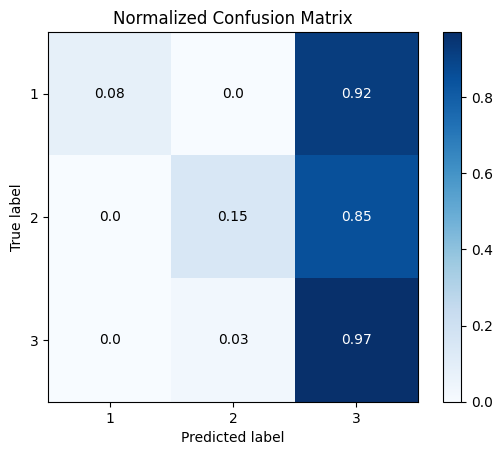

In [ ]:
# evaluasi model random forest
skplt.metrics.plot_confusion_matrix(y_test, best_model_rf_result, normalize=True)

In [ ]:
# Evaluasi model random forest hasil hyperparameter tuning
pd.DataFrame(metrics.classification_report(y_test, best_model_rf_result, target_names = classes, output_dict=True))  # , '4', '5'

,1,2,3,accuracy,macro avg,weighted avg
precision,1.000000,0.590909,0.802865,0.791311,0.797925,0.758337
recall,0.076923,0.151163,0.971272,0.791311,0.399786,0.791311
f1-score,0.142857,0.240741,0.879076,0.791311,0.420891,0.738816
support,13.000000,602.000000,2193.000000,0.791311,2808.000000,2808.000000


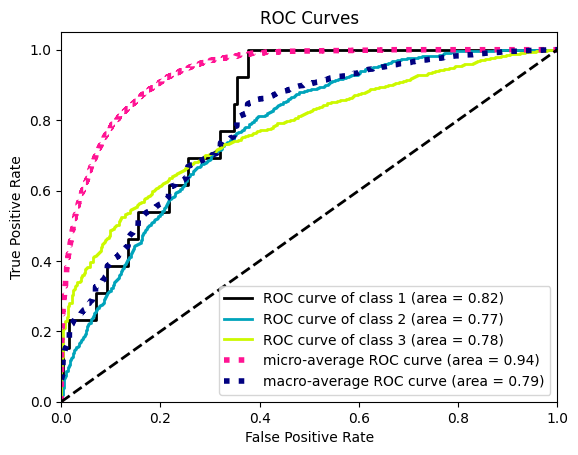

In [ ]:
# Evaluasi model random forest
skplt.metrics.plot_roc(y_test, best_model_rf_proba);

## Logistic Regression

In [ ]:
# Mendefinisikan model regresi logistik
logreg_model = LogisticRegression()

# mendefinisikan parmeter untuk tuning
param_grid = {
    'C': [0.1, 10, 100],
    'penalty': ['l2', 'none'],  # 'l1' can also be used if the solver supports it
    'solver': ['lbfgs', 'saga'],
    'max_iter': [200, 500, 750]
}

Selanjutnya kita akan setting objek GridSearchCV untuk mencari model terbaik

In [ ]:
# definisikan objek GridSearchCV
grid_search = GridSearchCV(
    estimator=logreg_model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy'
)

# fit model dengan data
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 10, 100], 'max_iter': [200, 500, 750],
                         'penalty': ['l2', 'none'],
                         'solver': ['lbfgs', 'saga']},
             scoring='accuracy')

In [ ]:
# ambil parameter dari model terbaik
best_params_lr = grid_search.best_params_
# ambil model terbaik dari hasil tuning
best_model_lr = grid_search.best_estimator_

# cek setting hyperparameter terbaik
print(f"Best Hyperparameters: {best_params_lr}")

Best Hyperparameters: {'C': 0.1, 'max_iter': 750, 'penalty': 'l2', 'solver': 'lbfgs'}


## Evaluasi Logistic Regression Hasil Hyperparameter Tuning

In [ ]:
# buat prediksi dari model terbaik
best_model_lr_result = best_model_lr.predict(X_test)
best_model_lr_proba = best_model_lr.predict_proba(X_test)

<Axes: title={'center': 'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

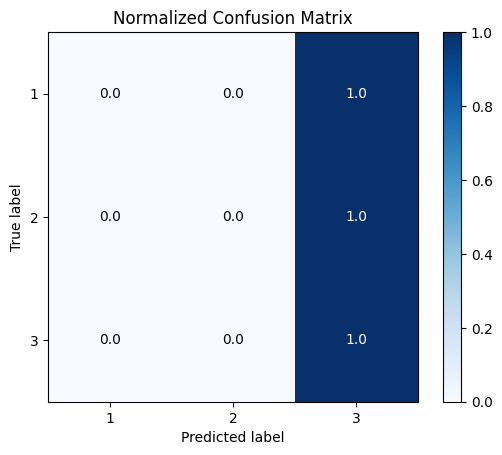

In [ ]:
# evaluasi model random forest
skplt.metrics.plot_confusion_matrix(y_test, best_model_lr_result, normalize=True)

In [ ]:
# Evaluasi model random forest
pd.DataFrame(metrics.classification_report(y_test, best_model_lr_result, target_names = classes, output_dict=True))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,1,2,3,accuracy,macro avg,weighted avg
precision,0.0,1.000000,0.781540,0.781695,0.593847,0.824756
recall,0.0,0.003322,1.000000,0.781695,0.334441,0.781695
f1-score,0.0,0.006623,0.877375,0.781695,0.294666,0.686635
support,13.0,602.000000,2193.000000,0.781695,2808.000000,2808.000000


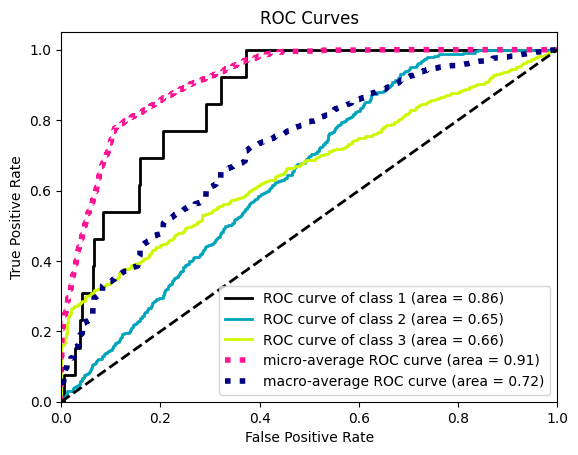

In [ ]:
# Evaluasi model random forest
skplt.metrics.plot_roc(y_test, best_model_lr_proba);

# Interpretasi Model

## Interpretasi Model Random Forest

Inisiasi objek explainer dari model

In [ ]:
# membuat objek explainer dari model

X_test = X_test.reset_index(drop=True)

explainer = dx.Explainer(best_model_rf, X_test, y_test.astype(int), label="Random Forest")

Preparation of a new explainer is initiated

  -> data              : 2808 rows 7 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 2808 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : Random Forest
  -> predict function  : <function yhat_proba_default at 0x7ed716f7e0e0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0, mean = 0.202, max = 0.869
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = 0.524, mean = 2.57, max = 3.0
  -> model_info        : package sklearn

A new explainer has been created!


## Feature Importance

Untuk mengeluarkan feature importance, kita bisa menggunakan method `model_parts` dari objek explainer

In [ ]:
# Feature Importance
importance = explainer.model_parts()
importance.plot()

## Partial Dependence Plot

Untuk membuat partial dependence plot, kita bisa menggunakan method `model_profile` dari objek explainer:

In [ ]:
# Partial Dependence Plot (PDP) for the first feature
pdp = explainer.model_profile()
pdp.plot()

Calculating ceteris paribus:   0%|          | 0/7 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/dalex/predict_explanations/_ceteris_paribus/utils.py:100: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.    0.32  0.64 ... 31.36 31.68 32.  ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

Calculating ceteris paribus:  14%|█▍        | 1/7 [00:01<00:08,  1.43s/it]/usr/local/lib/python3.10/dist-packages/dalex/predict_explanations/_ceteris_paribus/utils.py:100: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1.00000000e+00 6.91194150e+05 1.38238730e+06 ... 6.77369297e+07
 6.84281229e+07 6.91193160e+07]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

Calculating ceteris paribus:  29%|██▊       | 2/7 [00:02<00:07,  1.50s/it]/usr/local/lib/python3.10/dist-pack